In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import display
from utils import *

In [2]:
results = pd.read_csv("../results_gathering/results_table.csv")
results.head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
0,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
1,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
2,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
3,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
4,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt


In [3]:
results.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [4]:
# Remove non readable examples
print(f"Len of results table with all examples: {len(results)}")
results = results[results.redable_label == True]
results = results[results.text_len != '0']
print(f"Len of results table without non readable examples: {len(results)}")

Len of results table with all examples: 38334
Len of results table without non readable examples: 24377


In [5]:
path = "./overall_plots"

## Detection results analysis

In [6]:
models_list = list(results.model.unique())
weights_list = list(results.weights.unique())

In [7]:
detection_metrics = detection_metrics_to_df(results, models_list, weights_list)
detection_metrics

,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,81.24,70.14,75.28
1,System z modelem db wytrenowany na zbiorze ic15,77.82,73.82,75.77
2,System z modelem textfusenet wytrenowany na zb...,91.73,60.50,72.91
3,System z modelem textfusenet wytrenowany na zb...,89.51,68.64,77.70


In [8]:
detection_metrics.system.values

array(['System z modelem db wytrenowany na zbiorze tt',
       'System z modelem db wytrenowany na zbiorze ic15',
       'System z modelem textfusenet wytrenowany na zbiorze tt',
       'System z modelem textfusenet wytrenowany na zbiorze ic15'],
      dtype=object)

In [9]:
import seaborn as sns
sns.set_theme()

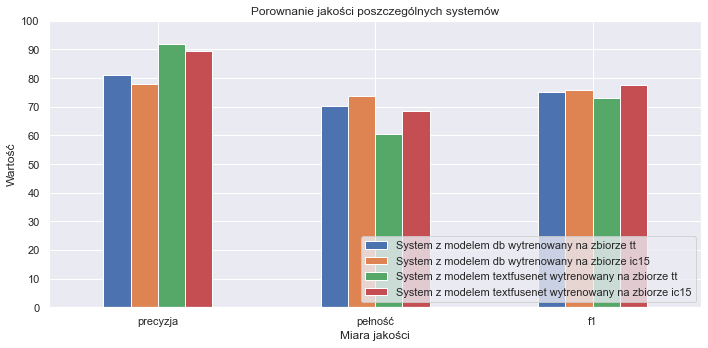

In [10]:
plot_detection_metrics(detection_metrics, f"{path}/detection_metrics.png",
                          title = f"Porownanie jakości poszczególnych systemów")

### plot detections of each system on random image from totaltext dataset

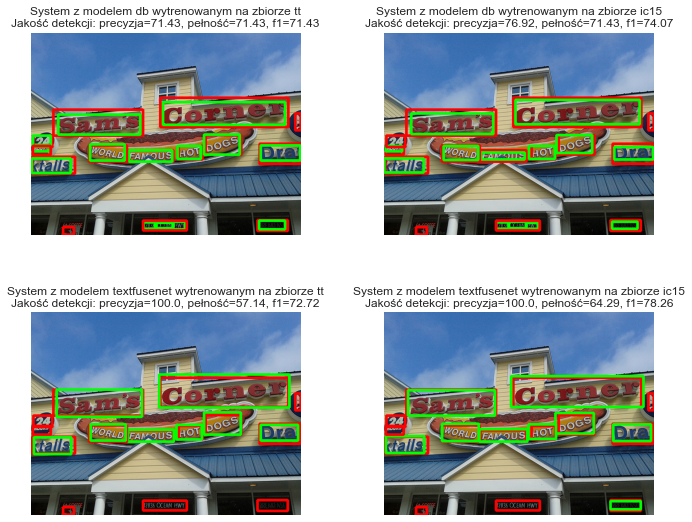

In [32]:
plot_detections(results, models_list, weights_list, filename=f"{path}/detections.jpg")

## Recognition results analysis

In [12]:
recognition_metrics = recognition_metrics_to_df(results, models_list, weights_list)
recognition_metrics

,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,78.78,55.26
1,System z modelem db z wagami ic15,77.68,57.34
2,System z modelem textfusenet z wagami tt,77.60,46.95
3,System z modelem textfusenet z wagami ic15,76.16,52.27


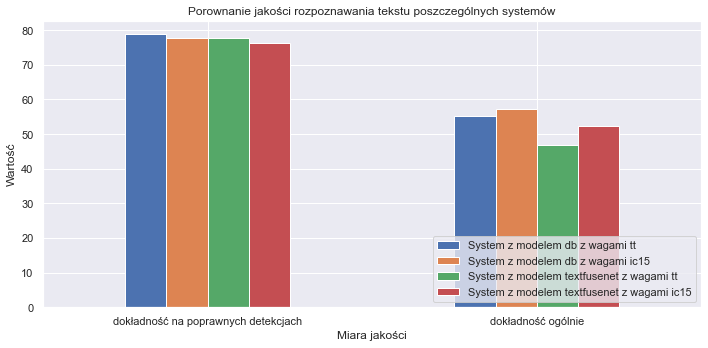

In [13]:
plot_recognition_metrics(recognition_metrics, f"{path}/recognition_metrics.png",
                          title = f"Porownanie jakości rozpoznawania tekstu poszczególnych systemów")

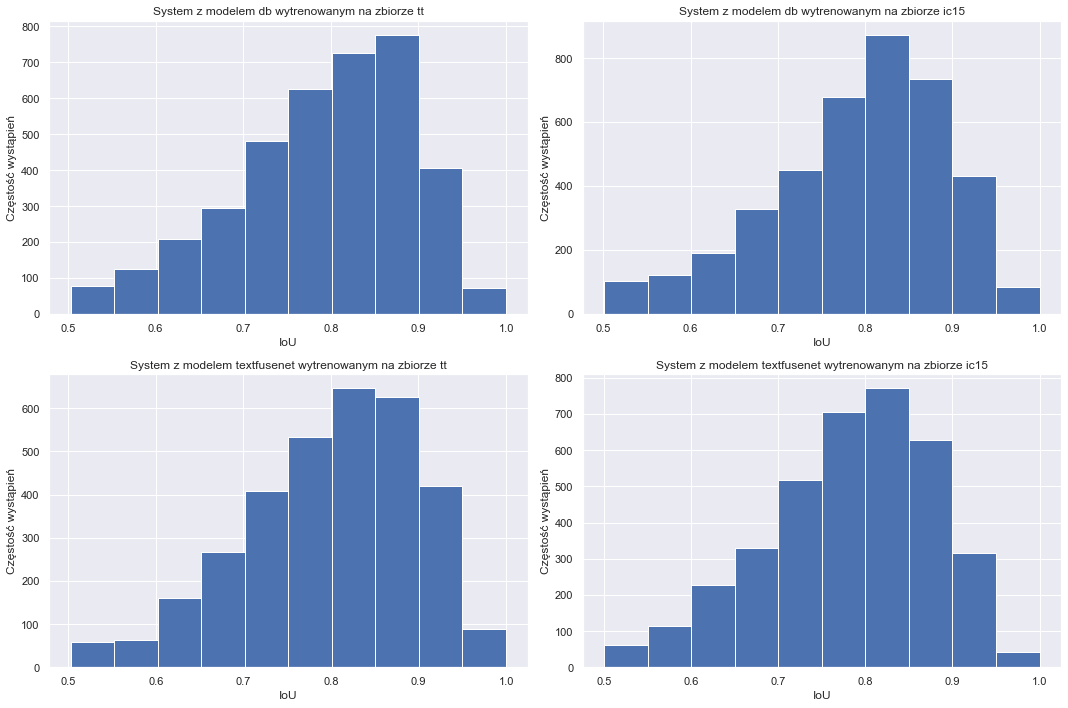

In [14]:
## IOU histogram
plot_iou_histogram(results, models_list, weights_list, filename=f"{path}/iou_histograms.jpg")

### Recognition example

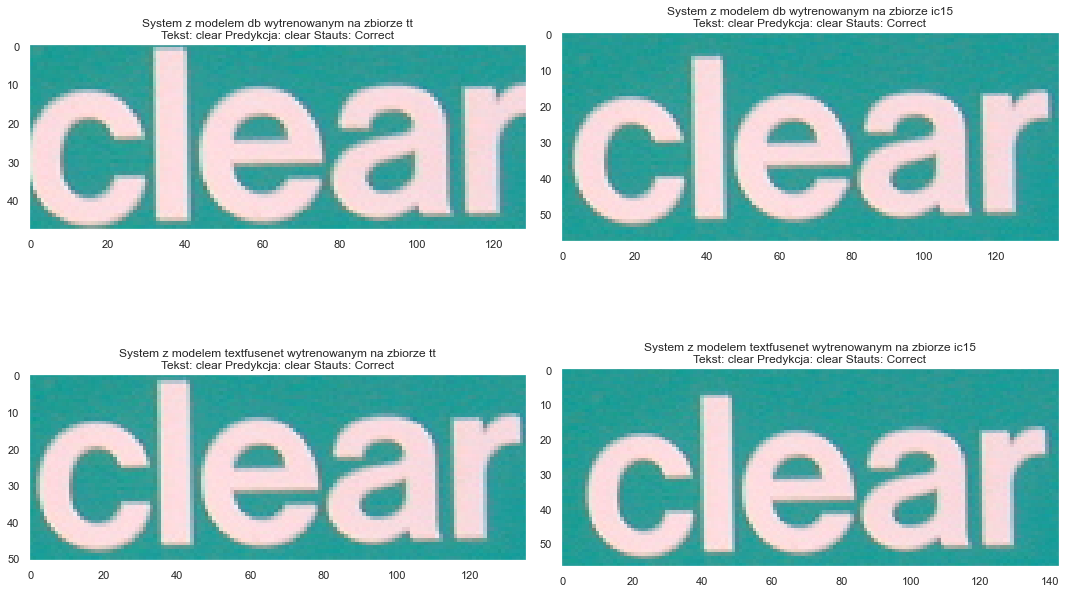

In [15]:
plot_recognitions(results, models_list, weights_list, filename=f"{path}/recognitions.jpg")